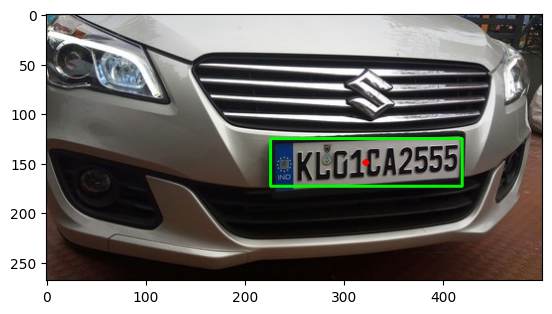

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/ANPR/archive/images/Cars0.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

rec = cv.rectangle(img, (226,125), (419,173), (0,250,0),2)
rec = cv.circle(rec, ((226+419)//2,(125+173)//2), 2, (255,0,0),2)
plt.imshow(rec)

In [ ]:
!pip install beautifulsoup4

In [ ]:


def normalized_coordinates(filename, width, height, xmin, ymin, xmax, ymax):
    """Take in image coordinates (unnormalized) as input, return normalized values
    """

    xmin, xmax = xmin / width, xmax / width
    ymin, ymax = ymin / height, ymax/ height

    width = xmax-xmin
    height = ymax-ymin
    x_center = xmin + (width / 2)
    y_center = ymin + (height / 2)

    return x_center, y_center, width, height

def write_label(filename, x_center, y_center, width, height):
    """Save image's coordinates in text file named "filename"
    """
    with open(filename, mode='w') as outf:
        outf.write(f"{0} {x_center} {y_center} {width} {height}\n")

def parse_xml_tags(data):
    """Parse xml label file, return image file name, and its coordinates as a dictionary
    """
    tags = ['filename', 'width', 'height', 'xmin', 'ymin', 'xmax', 'ymax']
    Bs_data = BeautifulSoup(data, "xml")
    d = dict()

    for t in tags:
        text = Bs_data.find(t).text
        if all(c.isdigit() for c in text):
            d[t] = int(text)
        else:
            d[t] = text
    return d

def build_data(dir_folder, ann_file_list, img_dir):
    """Write xml labels to text file with specifications format, save at 'labels' folder.
        Move image to 'images' folder
    """
    images_folder = f"{dir_folder}/images"
    labels_folder = f"{dir_folder}/labels"

    os.makedirs(images_folder, exist_ok = True)
    os.makedirs(labels_folder, exist_ok = True)


    for ann_file in ann_file_list:
        with open(ann_file, 'r') as f:
            label = parse_xml_tags(f.read())

        img_file_name = label['filename']
        x_center, y_center, width, height = normalized_coordinates(**label)

        # save at 'labels' folder
        write_label(f"{labels_folder}/{img_file_name.split('.')[0]}.txt", x_center, y_center, width, height)

         # Move image to 'images' folder
        shutil.copy(f"{img_dir}/{img_file_name}", f"{images_folder}/{img_file_name}")

In [ ]:
import glob
import os
from bs4 import BeautifulSoup
import shutil
dir_folder = "/content/drive/MyDrive/ANPR"

ann_list = glob.glob('/content/drive/MyDrive/ANPR/numberplateDetection/images/*.xml')
build_data(dir_folder, ann_list, "/content/drive/MyDrive/ANPR/numberplateDetection/images")

ann_list = glob.glob('/content/drive/MyDrive/ANPR/archive/annotations/*')
build_data(dir_folder, ann_list, "/content/drive/MyDrive/ANPR/archive/images")



In [ ]:
import yaml

data = {
    "path": dir_folder,
    "train": "images",
    "val": "",
    "names": {0: "car_lisence_plate"}
    }

with open('/content/drive/MyDrive/ANPR/dataset.yaml', 'w') as outfile:
    yaml.dump(data, outfile, default_flow_style=False)

# path: /content/plate_data  # dataset root dir
# train: /content/plate_data/train/images  # (relative to 'path')
# val: /content/plate_data/val/images  # (relative to 'path')
# test:  # test images (optional)

# names:
#   0: no_car_plate
#   1: car_lisence_plate
#   2: car

In [ ]:
assert len(os.listdir("/content/drive/MyDrive/ANPR/labels")) == len(os.listdir("/content/drive/MyDrive/ANPR/images"))

In [ ]:
!pwd
%cd /content/drive/MyDrive/ANPR
!pwd

/
/content/drive/MyDrive/ANPR
/content/drive/MyDrive/ANPR


In [ ]:
#git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -r requirements.txt

/content/drive/MyDrive/ANPR/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 710.2/710.2 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.3 MB/s eta 0:00:00


In [ ]:
!python train.py --img 640 --batch 16 --epochs 20 --data /content/drive/MyDrive/ANPR/dataset.yaml --weights yolov5s.pt --cache ram

2024-02-13 13:11:29.932105: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-13 13:11:29.932191: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-13 13:11:29.938401: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/ANPR/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=

In [ ]:
!pip install torch
!pip install easyocr

In [ ]:
import torch

yolo = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/ANPR/yolov5/runs/train/exp/weights/best.pt')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-2-13 Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:
img = '/content/drive/MyDrive/ANPR/CAR9.jpg'

# Inference
results = yolo(img)

cordinates = results.xyxy[0][:, :-1]
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,387.417145,1814.363281,703.502258,1989.619141,0.819332,0,car_lisence_plate


In [ ]:
def read_plate_number(results, frame, reader):
    n = len(results)
    x_shape, y_shape = frame.shape[1], frame.shape[0]
    plate_numbers = []

    for i in range(n):
        row = cordinates[i] # Iterate through each image
        if row[4] >= 0.5: ## Take img with 0.5 confidence
            xmin, ymin, xmax, ymax = row[:4]
            plate = frame[int(ymin):int(ymax), int(xmin):int(xmax)]

            ## Preprocess Plate
            gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
            blurred = cv2.bilateralFilter(gray, 17, 15, 15)
#             ret, thresh = cv.threshold(blurred, 125, 255, cv.THRESH_BINARY)

            ## OCR
            text = reader.readtext(blurred)
            text = ' '.join([t[1] for t in text])

            plot_img = frame.copy()

            cv2.rectangle(plot_img, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2) ## BBox
            cv2.rectangle(plot_img, (int(xmin), int(ymin-20)), (int(xmax), int(ymin)), (0, 255,0), -1) ## for text label background
            final_img = cv2.putText(plot_img, f"{text}", (int(xmin), int(ymin)), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255), 2)

            text = reader.readtext(blurred)
            text = ' '.join([t[1] for t in text])
            plate_numbers.append(text)  # Append predicted plate number to the list

    # Write plate numbers to the output file
            with open('/content/drive/MyDrive/numberplates.txt', 'w') as f:
                for plate_number in plate_numbers:
                    f.write(plate_number + '\n')


            print(plate_numbers)
            return final_img

#             return cv.cvtColor(final_img, cv.COLOR_BGR2RGB)
#             cv.imwrite(f'/kaggle/working/labeled_img_{i}.jpg', cv.cvtColor(final_img, cv.COLOR_BGR2RGB))

In [ ]:
from google.colab.patches import cv2_imshow

['4gs" Lwo']


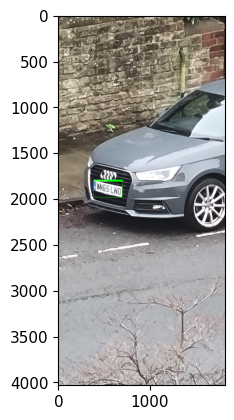

In [ ]:
import matplotlib.pyplot as plt
import easyocr
import cv2
%matplotlib inline

reader = easyocr.Reader(['en'])
# cordinates = cordinates.cpu().numpy()

frame = cv2.imread(img) ### reading the image

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

result_img = read_plate_number(cordinates, frame, reader)
plt.imshow(result_img)
plt.show();

In [ ]:
from cv2 import waitKey
import torch
import cv2
import numpy as np
import time


# Model
model_path = r"/content/drive/MyDrive/ANPR/yolov5/runs/train/exp/weights/best.pt"  #custom model path
video_path = r"/content/drive/MyDrive/ANPR/CarVideo1.mp4"  #input video path
cpu_or_cuda = "cpu"  #choose device; "cpu" or "cuda"(if cuda is available)
device = torch.device(cpu_or_cuda)
model = torch.hub.load('ultralytics/yolov5', 'custom', path= model_path, force_reload=True)
model = model.to(device)
frame = cv2.VideoCapture(video_path)

frame_width = int(frame.get(3))
frame_height = int(frame.get(4))
size = (frame_width, frame_height)
writer = cv2.VideoWriter('output.mp4',-1,8,size)

text_font = cv2.FONT_HERSHEY_PLAIN
color= (0,0,255)
text_font_scale = 1.25
prev_frame_time = 0
new_frame_time = 0

# Inference Loop
while True:
    ret, image = frame.read()
    if ret:
        output = model(image)
        result = np.array(output.pandas().xyxy[0])
        for i in result:
            p1 = (int(i[0]),int(i[1]))
            p2 = (int(i[2]),int(i[3]))
            text_origin = (int(i[0]),int(i[1])-5)
            #print(p1,p2)
            cv2.rectangle(image,p1,p2,color=color,thickness=2)  #drawing bounding boxes
            cv2.putText(image,text=f"{i[-1]} {i[-3]:.2f}",org=text_origin,
                        fontFace=text_font,fontScale=text_font_scale,
                        color=color,thickness=2)  #class and confidence text

        new_frame_time = time.time()

        fps = 1/(new_frame_time-prev_frame_time)
        prev_frame_time = new_frame_time
        fps = int(fps)
        fps = str(fps)
        cv2.putText(image, fps, (7, 70), text_font, 3, (100, 255, 0), 3, cv2.LINE_AA)
        writer.write(image)
        cv2_imshow(image)

    else:
        break

    if waitKey(1) & 0xFF == ord('q'):
        break


frame.release()
cv2.destroyAllWindows()

In [ ]:
from cv2 import waitKey
import torch
import cv2
import numpy as np
import time
import easyocr

# Load OCR Reader
reader = easyocr.Reader(['en'])

def read_plate_number(results, frame, reader):
    n = len(results)
    plate_numbers = []

    for i in range(n):
        row = results[i] # Iterate through each result
        xmin, ymin, xmax, ymax, conf, cls = row[:6]  # Extract bounding box coordinates and confidence
        plate = frame[int(ymin):int(ymax), int(xmin):int(xmax)]

        ## Preprocess Plate
        gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
        blurred = cv2.bilateralFilter(gray, 17, 15, 15)

        ## OCR
        text = reader.readtext(blurred)
        text = ' '.join([t[1] for t in text])
        plate_numbers.append(text)  # Append predicted plate number to the list

        ## Draw bounding box and text on frame
        cv2.rectangle(frame, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)  # BBox
        cv2.rectangle(frame, (int(xmin), int(ymin-20)), (int(xmax), int(ymin)), (0, 255,0), -1)  # Text background
        frame = cv2.putText(frame, f"{text}", (int(xmin), int(ymin)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)

    return frame, plate_numbers

# Model and Video paths
model_path = r"/content/drive/MyDrive/ANPR/yolov5/runs/train/exp/weights/best.pt"  #custom model path
video_path = r"/content/drive/MyDrive/ANPR/CarVideo2.mp4"  #input video path
cpu_or_cuda = "cpu"  #choose device; "cpu" or "cuda"(if cuda is available)
device = torch.device(cpu_or_cuda)
model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path, force_reload=True).to(device)
frame = cv2.VideoCapture(video_path)

# Output video setup
frame_width = int(frame.get(3))
frame_height = int(frame.get(4))
size = (frame_width, frame_height)
writer = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 8, size)

text_font = cv2.FONT_HERSHEY_PLAIN
color = (0, 0, 255)
text_font_scale = 1.25
prev_frame_time = 0

# Inference Loop
while True:
    ret, image = frame.read()
    if ret:
        output = model(image)
        results = output.xyxy[0].cpu().numpy()

        # Read plate numbers and draw on frame
        final_img, plate_numbers = read_plate_number(results, image, reader)

        # Display FPS
        new_frame_time = time.time()
        fps = 1 / (new_frame_time - prev_frame_time)
        prev_frame_time = new_frame_time
        fps = int(fps)
        fps = str(fps)
        cv2.putText(final_img, fps, (7, 70), text_font, 3, (100, 255, 0), 3, cv2.LINE_AA)

        # Write frame to output video
        writer.write(final_img)

        # Display the frame
        cv2_imshow(final_img)

    else:
        break

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

frame.release()
writer.release()
cv2.destroyAllWindows()
